**XG boosting RESIZED**

**Kept year 2015 rows**

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df=pd.read_csv(r'C:\Users\Malaika\Documents\resized_data2.csv')

In [3]:
df.head(5)

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,...,IUCR_5094,IUCR_5110,IUCR_5111,IUCR_5112,IUCR_5113,IUCR_5114,IUCR_5121,IUCR_5130,IUCR_5131,IUCR_5132
0,0,0,0.550457,0.542373,1.025482,-0.582108,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1.260365,1.266538,1.822943,1.844403,0.807598,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.131685,1.121705,1.532957,-1.468719,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.027879,-0.036959,0.083027,-0.535445,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,-0.314156,-0.326625,-1.439399,1.097784,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
arrest_counts = df['Arrest'].value_counts()
print(arrest_counts)

Arrest
0    63703
1    22834
Name: count, dtype: int64


* training 5000 rows

In [5]:
df_1 = df.sample(n=5000, random_state=42)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df_1.drop('Arrest', axis=1)
y = df_1['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [6]:
y_pred = xg_clf.predict(X_test)

In [7]:
#Scores

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 5000 rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')

Scores with 5000 rows: 
Accuracy: 0.8870
F1 Score: 0.8398
Precision: 0.8904
recall: 0.8109


* testing with 10000 rows

In [8]:
df_2 = df.sample(n=10000, random_state=42)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df_2.drop('Arrest', axis=1)
y = df_2['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [9]:
y_pred = xg_clf.predict(X_test)

In [63]:
#Scores for 10,000 rows

accuracy_2 = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred, average='macro')
precision_2=precision_score(y_test, y_pred, average='macro')
recall_2=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 10,000 rows: ')
print(f"Accuracy: {accuracy_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print(f'Precision: {precision_2:.4f}')
print(f'recall: {recall_2:.4f}')

Scores with 10,000 rows: 
Accuracy: 0.8830
F1 Score: 0.8341
Precision: 0.8746
recall: 0.8090


* testing all data

In [10]:


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df.drop('Arrest', axis=1)
y = df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [11]:
y_pred = xg_clf.predict(X_test)

In [12]:
#Scores for all rows

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')

print(f'Scores (Whole dataset) rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')

# Prescision imporves, while recall drops

Scores (Whole dataset) rows: 
Accuracy: 0.8881
F1 Score: 0.8373
Precision: 0.9016
recall: 0.8039


**Creating a Confusion matrix for the model with all rows**

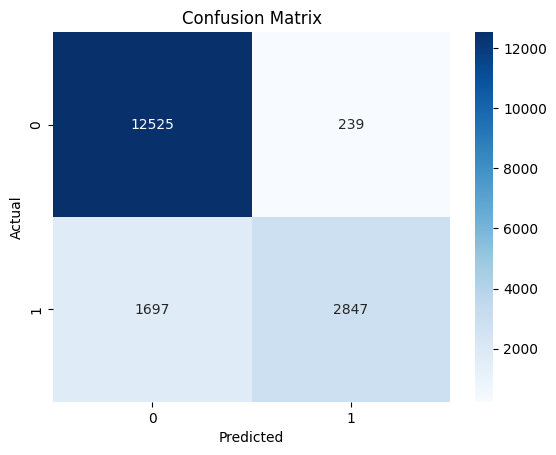

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

metric_text=(
    f'Scores with all rows:\n'
    f"Accuracy: {accuracy:.4f}\n"
    f"F1 Score: {f1:.4f}\n"
    f'Precision: {precision:.4f}\n'
    f'recall: {recall:.4f}\n'
)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Confusion metrics insights**

* True positive cases: 12525
* True Negative cases: 2847
* False negative cases: 239
* False positive cases: 1697

* In 2015, there were not that many arrest, based on this data.
* The model has 12525 cases were it correctly predicted no arrest
* 2847 cases where it predicted arrest correctly
* The model missed 1697 arrest


**tuning number of estimators**

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score

#nvm chagne it back to f1
xgb_model = XGBClassifier(objective='binary:logistic')
param_grid = {
    'max_depth': [5, 7,10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150,200,300,400],
}

grid_search = GridSearchCV(
    estimator=xgb_model,param_grid=param_grid,scoring='f1', cv=5,verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 7, 10],
                         'n_estimators': [100, 150, 200, 300, 400]},
             scoring='f1', verbose=1)

In [16]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}
Best accuracy score found:  0.7506944301176225


**Grid search**

* learning_rate=0.1, speed the model learns
* max_depth was 7 (how far the descion trees grew)
* n_estimator was 300 (number of trees made)

* Overall, grid search gives a more realistic evaluation

**confusion matrix for grid search**

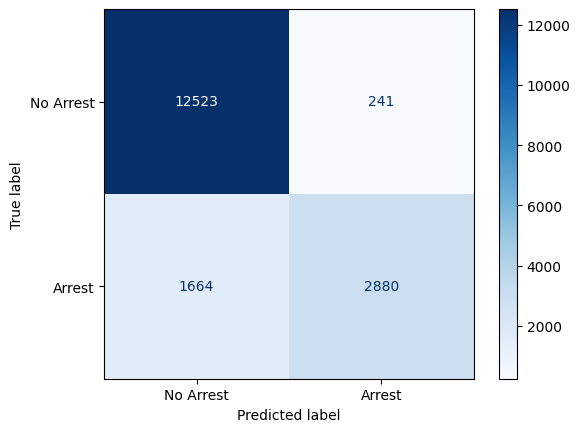

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Arrest', 'Arrest'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [105]:
print("Best cross-validated F1 score:", grid_search.best_score_)

Best cross-validated F1 score: 0.7468436391118257
